## Assignment : Machine Learning

<b>Assignment</b>  : Machine Learning <br>
<b>Student ID</b>  : 2019HT13092   <br>
<b>Name   </b>     : Amardip Ghodichor <br>
<b>DataSet </b>    : https://archive.ics.uci.edu/ml/datasets/Letter+Recognition (Letter Recognition)


First, Lets import all the required modules/packages/libraries.

In [2]:
#Import modules/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import itertools

## Import Data using Pandas

## Summary <br>
1. Title: Letter Image Recognition Data 

2. Source Information
   -- Creator: David J. Slate
     -- Odesta Corporation; 1890 Maple Ave; Suite 115; Evanston, IL 60201
   -- Donor: David J. Slate (dave@math.nwu.edu) (708) 491-3867   
   -- Date: January, 1991

3. Past Usage:
   -- P. W. Frey and D. J. Slate (Machine Learning Vol 6 #2 March 91):
	"Letter Recognition Using Holland-style Adaptive Classifiers".

   	The research for this article investigated the ability of several
	variations of Holland-style adaptive classifier systems to learn to
	correctly guess the letter categories associated with vectors of 16
	integer attributes extracted from raster scan images of the letters.
	The best accuracy obtained was a little over 80%.  It would be
	interesting to see how well other methods do with the same data.

4. Relevant Information:

   The objective is to identify each of a large number of black-and-white
   rectangular pixel displays as one of the 26 capital letters in the English
   alphabet.  The character images were based on 20 different fonts and each
   letter within these 20 fonts was randomly distorted to produce a file of
   20,000 unique stimuli.  Each stimulus was converted into 16 primitive
   numerical attributes (statistical moments and edge counts) which were then
   scaled to fit into a range of integer values from 0 through 15.  We
   typically train on the first 16000 items and then use the resulting model
   to predict the letter category for the remaining 4000.  See the article
   cited above for more details.

5. Number of Instances: 20000

6. Number of Attributes: 17 (Letter category and 16 numeric features)

7. Attribute Information:
	 1.	lettr	capital letter	(26 values from A to Z)
	 2.	x-box	horizontal position of box	(integer)
	 3.	y-box	vertical position of box	(integer)
	 4.	width	width of box			(integer)
	 5.	high 	height of box			(integer)
	 6.	onpix	total # on pixels		(integer)
	 7.	x-bar	mean x of on pixels in box	(integer)
	 8.	y-bar	mean y of on pixels in box	(integer)
	 9.	x2bar	mean x variance			(integer)
	10.	y2bar	mean y variance			(integer)
	11.	xybar	mean x y correlation		(integer)
	12.	x2ybr	mean of x * x * y		(integer)
	13.	xy2br	mean of x * y * y		(integer)
	14.	x-ege	mean edge count left to right	(integer)
	15.	xegvy	correlation of x-ege with y	(integer)
	16.	y-ege	mean edge count bottom to top	(integer)
	17.	yegvx	correlation of y-ege with x	(integer)

8. Missing Attribute Values: None

9. Class Distribution:
 	789 A	   766 B     736 C     805 D	 768 E	   775 F     773 G
 	734 H	   755 I     747 J     739 K	 761 L	   792 M     783 N
 	753 O	   803 P     783 Q     758 R	 748 S	   796 T     813 U
 	764 V	   752 W     787 X     786 Y	 734 Z

In [3]:
#Name the headers of the data and read the file
colName = ['lettr','x-box','ybox','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx'];
data = pd.read_csv('letter-recognition.data',header = None, names = colName);

# Quick Visualise - Top 5 data
data.head()

,lettr,x-box,ybox,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


Confirm if any column has "NULL" values

In [4]:
#Check for missing values
pd.isnull(data).sum()

lettr    0
x-box    0
ybox     0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
dtype: int64

# Data Distribution Verification

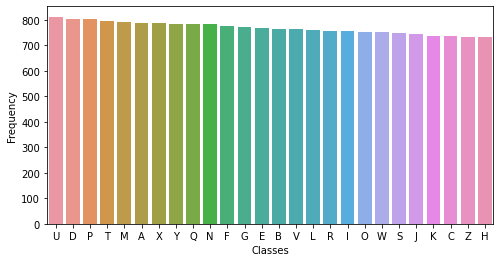

In [5]:
#Check whether the classes are balanced or not
plt.subplots(figsize=(8,4))
sns.barplot(x = data['lettr'].value_counts().index, y = data['lettr'].value_counts().values);
plt.xlabel('Classes');
plt.ylabel('Frequency');

## Data Preprocessing <br>
This function will divide Train Data and Test Data. <br>
TrainData = 16900 <br>
TestData  = 3100 <br>

Step 1: Separate Features and Classes (Letters) <br>
Step 2: Shuffle Training and Testing data so that our model do not learn any insignificant pattern <br>

In [54]:

#Function that divides the data into training and test randomly
def Preprocessing(df):
    labels_train = pd.DataFrame();
    features_train = pd.DataFrame();
    labels_test = pd.DataFrame();
    features_test = pd.DataFrame();
    #Seperate features and labels of each class
    for i in range(26):
        labels_class = df.lettr[df['lettr'] == chr(ord('A') + i)];
        features_class = df[df['lettr'] == chr(ord('A') + i)].drop(['lettr'], axis = 1);
        
        #Random Indexes to divide the dataset into train and test
        index = np.random.permutation(len(labels_class));
        # print(labels_class.iloc[index[650]])
        labels_train = pd.concat([labels_train, labels_class.iloc[index[0:650:1]]]);
        features_train = pd.concat([features_train, features_class.iloc[index[0:650:1]]]);

        # Labels
        labels_test = pd.concat([labels_test, labels_class.iloc[index[650:len(labels_class)]]]);
        features_test = pd.concat([features_test, features_class.iloc[index[650:len(labels_class)]]]);

    #Shuffle the training data
    shuff = np.random.permutation(len(labels_train));
    labels_train = labels_train.iloc[shuff];
    features_train = features_train.iloc[shuff];
    
    #Shuffle the test data
    shuff = np.random.permutation(len(labels_test));
    labels_test = labels_test.iloc[shuff];
    features_test = features_test.iloc[shuff];

    return labels_train, features_train, labels_test, features_test;

In [55]:
labels_train, features_train, labels_test, features_test = Preprocessing(data);
labels_train.columns = ['lettr'];
labels_test.columns = ['lettr'];

print("Training data : ", labels_train.shape)
print("Testing data : ",labels_test.shape)

Training data :  (16900, 1)
Testing data :  (3100, 1)


# Feature Normalization

In [9]:
#Normalize the features matrices for Neural Networks and logistic regression
features_train = features_train/15
features_test = features_test/15

In [10]:
def softmax(ar):
    exps = np.exp(ar)
    denom = sum(exps)
    softmax = exps/denom
    return softmax

## Algorithm 1: Logistic Regression

In [13]:
#Implementation of Logistic regression using neural networks with SGD + momentum

#Initalize weight and bias using Xaviers Initialization
#Source:https://mnsgrg.com/2017/12/21/xavier-initialization/
b = -np.sqrt(6/(16+26)) + 2*np.sqrt(6/(16+26))*np.random.uniform(size = (26,1))
w = -np.sqrt(6/(16+26)) + 2*np.sqrt(6/(16+26))*np.random.uniform(size = (26,16))

#Initialize Variables
epoch = 50
lr = 0.05
alp = 0.35
lbl = np.zeros((26,1))
err = np.zeros((epoch,1))
acc = np.zeros((epoch,1))
db = np.zeros((26,1))   #Gradient for bias
dw = np.zeros((26,16))  #Gradient for weight

#Temp variables to save best parameters
min_err = np.Inf
max_acc = 0
bpred = np.zeros((len(labels_test),1))
pred = [None] * len(labels_test)

for i in range(epoch):
    shuff = np.random.permutation(len(labels_train))
    #Pass over an epoch
    for j in range(len(labels_train)):
        cls = labels_train.iloc[shuff[j]]
        lbl[ord(cls[0]) - 65] = 1    #One hot encoding

        #Forward Pass
        f = np.reshape(np.array(features_train.iloc[shuff[j]]),(16,1))
        #Feature needs to be reshaped due to numpy default behaviour
        tot = np.matmul(w,f) + b
        o = softmax(tot)

        #Backward Pass
        db = alp*db + lr*(o-lbl)
        dw = alp*dw + lr*np.matmul((o-lbl),np.transpose(f))
        b = b - db
        w = w - dw

        lbl[:] = 0
    
    #Check performance on test set
    for k in range(len(labels_test)):
        cls = labels_test.iloc[k]
        lbl[ord(cls[0]) - 65] = 1
        f = np.reshape(np.array(features_test.iloc[k]),(16,1))
        tot = np.matmul(w,f) + b
        o = softmax(tot)

        maxIdx = np.argmax(o)
        pred[k] = chr(ord('A') + maxIdx)

        if pred[k] == cls[0]:
            acc[i] = acc[i] + 1

        entropy = -lbl*np.log(o)
        entropy = np.nan_to_num(entropy)
        err[i] = err[i] + np.sum(entropy)
        lbl[:] = 0
    
    #print('Epoch:', i, 'Accuracy:', acc[i]/len(labels_test)*100, 'Cross Entropy Error:', err[i]/len(labels_test))
    #Minimum Error 
    if (err[i] < min_err):
        min_err = err[i]
        bpred = pred

    #Set gradient and labels back to zero
    lbl[:] = 0
    db[:] = 0
    dw[:] = 0

## Algorithm 1 - LR Accuracy

In [14]:
print('Accuracy Using Logistic Regression:',np.around(np.max(acc)/len(labels_test)*100,decimals=3))

Accuracy Using Logistic Regression: 77.677


## Confusion Matrix to determine - how much wrong classification has been done

In [15]:
cnf = confusion_matrix(labels_test, bpred);cnf

array([[116,   0,   0,   1,   0,   0,   0,   0,   0,   6,   0,   0,   1,
          0,   0,   0,   2,   1,   7,   0,   2,   0,   0,   1,   2,   0],
       [  0,  80,   0,   4,   1,   1,   1,   3,   3,   1,   3,   0,   0,
          0,   1,   2,   2,   4,   6,   0,   0,   1,   0,   3,   0,   0],
       [  0,   0,  69,   0,   1,   0,   2,   0,   0,   0,   9,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0],
       [  0,   4,   0, 125,   0,   1,   0,   2,   0,   4,   0,   0,   0,
          3,   0,   4,   0,   5,   0,   3,   2,   0,   0,   1,   0,   1],
       [  0,   1,   3,   0,  90,   2,   5,   0,   0,   0,   1,   2,   0,
          0,   0,   0,   2,   0,   4,   3,   0,   0,   0,   2,   0,   3],
       [  0,   2,   0,   0,   2,  92,   3,   0,   0,   0,   0,   0,   0,
          0,   0,   9,   0,   0,   5,   8,   0,   0,   1,   1,   1,   1],
       [  1,   1,  38,   2,   0,   0,  42,   2,   0,   0,   8,   1,   0,
          0,   1,   3,  13,   3,   3,   0,   

## Plotting Graphs to show the model performance

Text(0, 0.5, 'Cross Entropy Error')

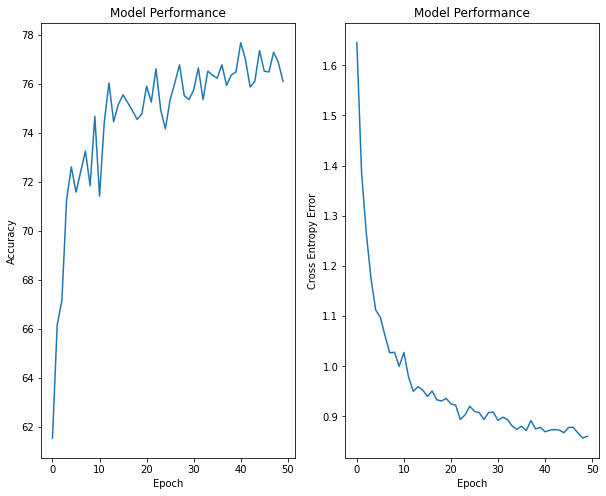

In [18]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.plot(np.arange(50),acc/len(labels_test)*100)
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(122)
plt.plot(np.arange(50),err/len(labels_test))
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Error')

## Algorithm 2: 2-layer neural networks

In [20]:
#Implementation of 2-layer neural networks with SGD + momentum

#Initalize weight and bias using Xaviers Initialization

hn1 = 64 #Number of hidden neurons in layer 1
hn2 = 32 #Number of hidden neurons in layer 2
b1 = -np.sqrt(6/(16+hn1)) + 2*np.sqrt(6/(16+hn1))*np.random.uniform(size = (hn1,1))
w1 = -np.sqrt(6/(16+hn1)) + 2*np.sqrt(6/(16+hn1))*np.random.uniform(size = (hn1,16))
b2 = -np.sqrt(6/(hn1+hn2)) + 2*np.sqrt(6/(hn1+hn2))*np.random.uniform(size = (hn2,1))
w2 = -np.sqrt(6/(hn1+hn2)) + 2*np.sqrt(6/(hn1+hn2))*np.random.uniform(size = (hn2,hn1))
b3 = -np.sqrt(6/(26+hn2)) + 2*np.sqrt(6/(26+hn2))*np.random.uniform(size = (26,1))
w3 = -np.sqrt(6/(26+hn2)) + 2*np.sqrt(6/(26+hn2))*np.random.uniform(size = (26,hn2))


#Initialize Variables
epoch = 100
lr = 0.09
alp = 0.008
lbl = np.zeros((26,1))
err = np.zeros((epoch,1))
acc = np.zeros((epoch,1))
db1 = np.zeros((hn1,1))   #Gradient for bias
dw1 = np.zeros((hn1,16))  #Gradient for weight
db2 = np.zeros((hn2,1))
dw2 = np.zeros((hn2,hn1))
db3 = np.zeros((26,1))
dw3 = np.zeros((26,hn2))

#Temp variables to save best parameters
min_err = np.Inf
max_acc = 0
bpred = np.zeros((len(labels_test),1))
for i in range(epoch):
    shuff = np.random.permutation(len(labels_train))
    #Pass over an epoch
    for j in range(len(labels_train)):
        cls = labels_train.iloc[shuff[j]]
        lbl[ord(cls[0]) - 65] = 1    #One hot encoding

        #Forward Pass
        f = np.reshape(np.array(features_train.iloc[shuff[j]]),(16,1)) #Feature needs to be reshaped due to numpy default behaviour
        l1 = np.matmul(w1,f) + b1
        o1 = 1/(1 + np.exp(-l1)) #Sigmoid
        l2 = np.matmul(w2,o1) + b2
        o2 = 1/(1 + np.exp(-l2))
        tot = np.matmul(w3,o2) + b3
        o = softmax(tot)

        #Backward Pass (Might be a little confusing, so try doing the steps on a small matrix)
        #pdb.set_trace()
        db3 = alp*db3 + lr*(o-lbl)
        dw3 = alp*db3 + lr*np.matmul((o-lbl),np.transpose(o2))
        db2 = alp*db2 + np.transpose(lr*np.matmul(np.transpose(o-lbl),w3))*o2*(1-o2)
        dw2 = alp*dw2 + np.transpose(lr*np.matmul(np.transpose(o-lbl),w3))*o2*(1-o2)*np.transpose(o1)
        db1 = alp*db1 + np.transpose(np.matmul(np.transpose(np.transpose(lr*np.matmul(np.transpose(o-lbl),w3))*o2*(1-o2)),w2))*o1*(1-o1)
        dw1 = alp*dw1 + np.matmul(np.transpose(np.matmul(np.transpose(np.transpose(lr*np.matmul(np.transpose(o-lbl),w3))*o2*(1-o2)),w2))*o1*(1-o1),np.transpose(f))

        b1 = b1 - db1
        w1 = w1 - dw1
        b2 = b2 - db2
        w2 = w2 - dw2
        b3 = b3 - db3
        w3 = w3 - dw3

        lbl[:] = 0
    
    #Check performance on test set
    for k in range(len(labels_test)):
        cls = labels_test.iloc[k]
        lbl[ord(cls[0]) - 65] = 1
        f = np.reshape(np.array(features_test.iloc[k]),(16,1))

        l1 = np.matmul(w1,f) + b1
        o1 = 1/(1 + np.exp(-l1)) #Sigmoid
        l2 = np.matmul(w2,o1) + b2
        o2 = 1/(1 + np.exp(-l2))
        tot = np.matmul(w3,o2) + b3
        o = softmax(tot)

        maxIdx = np.argmax(o)
        pred[k] = chr(ord('A') + maxIdx)

        if pred[k] == cls[0]:
            acc[i] = acc[i] + 1

        entropy = -lbl*np.log(o)
        entropy = np.nan_to_num(entropy)
        err[i] = err[i] + np.sum(entropy)
        lbl[:] = 0

            #pdb.set_trace()
    #print('Epoch:', i, 'Accuracy:', acc[i]/len(labels_test)*100, 'Cross Entropy Error:', err[i]/len(labels_test))
    #Early Stopping condition
    if (err[i] < min_err):
        min_err = err[i]
        bpred = pred

    #Set gradient and labels back to zero
    lbl[:] = 0
    db1[:] = 0
    dw1[:] = 0
    db2[:] = 0
    dw2[:] = 0


## Algorithm 2- Accuracy Neural Network

In [30]:
print('Accuracy using Neural Network with 2 Hidden Layers:',np.around(np.max(acc)/len(labels_test)*100,decimals=3))

Accuracy using Neural Network with 2 Hidden Layers: 94.742


In [31]:
cnf = confusion_matrix(labels_test, bpred);cnf

array([[136,   0,   0,   1,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 101,   0,   2,   0,   1,   0,   0,   0,   1,   1,   0,   0,
          0,   0,   0,   0,   3,   2,   0,   0,   5,   0,   0,   0,   0],
       [  0,   0,  83,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0, 142,   0,   1,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   1,   3,   0,   1,   4,   0,   0,   0,   0,   1],
       [  0,   1,   0,   0, 115,   0,   0,   0,   0,   0,   1,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0, 122,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   1,   0,   0,   0,   0],
       [  0,   1,   0,   0,   9,   0, 108,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   2,   0,   1,   0,   

## Plotting Graphs to show the model performance

Text(0, 0.5, 'Cross Entropy Error')

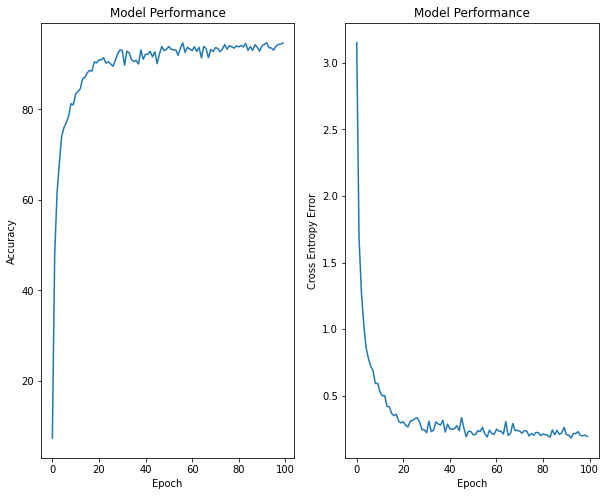

In [32]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.plot(np.arange(100),acc/len(labels_test)*100)
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(122)
plt.plot(np.arange(100),err/len(labels_test))
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Error')

## Algorithm 3- Random Forest Classifier using in built function of sklearn


In [60]:
clf = RandomForestClassifier(n_estimators=50,bootstrap = True);
clf.fit(features_train, labels_train);



## Algorithm 3 Accuracy - Random Forest

In [61]:

# Prediction
ypred = clf.predict(features_test);
acc = np.sum(np.array(ypred) == np.reshape(np.array(labels_test),(-1)))/len(labels_test)
print('The accuracy acheived using Random Forests: ', np.around(acc*100,3))

The accuracy acheived using Random Forests:  96.613


In [36]:
cnf = confusion_matrix(labels_test, ypred);cnf

array([[138,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0, 111,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   2,   1,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,  83,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0, 146,   0,   0,   0,   3,   0,   0,   1,   0,   0,
          1,   1,   0,   1,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   2,   0, 115,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   2,   0,   1,   0, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   2,   1,   0, 120,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   

## Conclusion
Below is the table which compares all the above implemented algorithms

|SN.| <b>Algorithm </b> | Accuracy |
|---|---|---|
|1.| Logistic Regression | 77.67 %|
|2.| Neural Network with 2 Hidden Layers      | 94.74 % |
|3.| Random Forest Classifier | 96.61 % |

From this we can conclude that, 

Random forest classifer with no. of trees = 50 out perform the logistic regression. <br>
There is a small margin in accuracy if we compare it with Neural Network with 2 hidden layers which has accuracy of 94.74 %.
 